# Vehicle Data Generator

This script generates data for the data to simulate the Decentralized Charge of Plug-in Electric Vehicles problem. 
The generated table receives as parameters a $N$ number of vehicles, to be charged from in an inverval of time $[t_{start}, t_{end}]$ each, with an initial and final $SOC$ (State of charge) level, distributed across a total sampling time $\Delta T$
Notation: 

$N$: Number of vehicles
$$



In [1]:
import numpy as np
import pandas as pd
import os
import random
from matplotlib import pyplot as plt

In [2]:
# CONSTANTS

N = 20
interval_length = 5 # Minutes
# They can have different values, not necessarily all the same

case = {}

case['capacity'] = [24]*N
case['p_max'] = [22]*N
case['p_min'] = [0]*N
case['epsilon'] = [0.1]*N
case['delta_t'] = [interval_length*60]*N # 300 = 60 sec * 5 min
case['target_charge'] = [24]*N

# Generation

In [3]:
# Hours of charge for each vechicle
time_of_charge = 3 # hours, approx
total_time = 16 # In hours
end_time_tolerance = 0.2
charge_tolerance = 0.2 # 20% lower than target_charge
max_initial_charge= 0.5
P_max = 20

# This distribution of connections will put the agents across the total time, in an ordered pseudo random fashion
ids = []

total_samples = int(total_time*60/interval_length)
charge_samples = time_of_charge*60/interval_length

total_samples_start = total_samples-charge_samples # Allowed start sample. Cannot start charging at very end of all, for example
separation = total_samples_start/N

starts, ends, socs = [], [], []

for i in range(N):
    
    start_time = np.floor(separation*(i+random.random()))
    end_time = np.floor(start_time + charge_samples*(1-end_time_tolerance*(1-random.random())))
    
    #SOC can be any number between 0 and capacity
    socs.append(round(case['capacity'][i]*random.random()*max_initial_charge*100)/100)
    starts.append(start_time)
    ends.append(end_time)

case['soc'] = socs
case['start_time'] = starts
case['end_time'] = ends


In [4]:
df = pd.DataFrame.from_dict(case)
df

,capacity,p_max,p_min,epsilon,delta_t,target_charge,soc,start_time,end_time
0,24,22,0,0.1,300,24,4.30,7.0,41.0
1,24,22,0,0.1,300,24,11.56,10.0,44.0
2,24,22,0,0.1,300,24,2.43,16.0,51.0
3,24,22,0,0.1,300,24,1.46,24.0,54.0
4,24,22,0,0.1,300,24,9.62,36.0,64.0
5,24,22,0,0.1,300,24,5.90,45.0,77.0
6,24,22,0,0.1,300,24,3.87,51.0,85.0
7,24,22,0,0.1,300,24,7.34,61.0,95.0
8,24,22,0,0.1,300,24,10.95,68.0,100.0
9,24,22,0,0.1,300,24,1.42,70.0,101.0


In [5]:
X, Y, M = [], [], []
for n in range(N):
    item = df.iloc[n]
    x = [t for t in range(int(item.start_time), int(item.end_time+1), 1)]
    m = (item.target_charge - item.soc)/(item.end_time - item.start_time)
    b = item.soc - m*item.start_time
    y = [m*x_ +b for x_ in x]
    M.append(m/5*60)
    X.append(x)
    Y.append(y)

df['X'] = X
df['Y'] = Y        
df['p_charge_rate'] = M


In [6]:
P, V = [], []

for t in range(total_samples):
    p = 0
    n_vehicles = 0
    for n in range(N):
        item = df.iloc[n]
        if t >= item.start_time and t <= item.end_time:
            n_vehicles += 1
            p += item.p_charge_rate
    P.append(p)
    V.append(n_vehicles)
            

In [7]:
def plot_common():
    plt.grid(True)
    plt.xlim([0, total_samples]) 

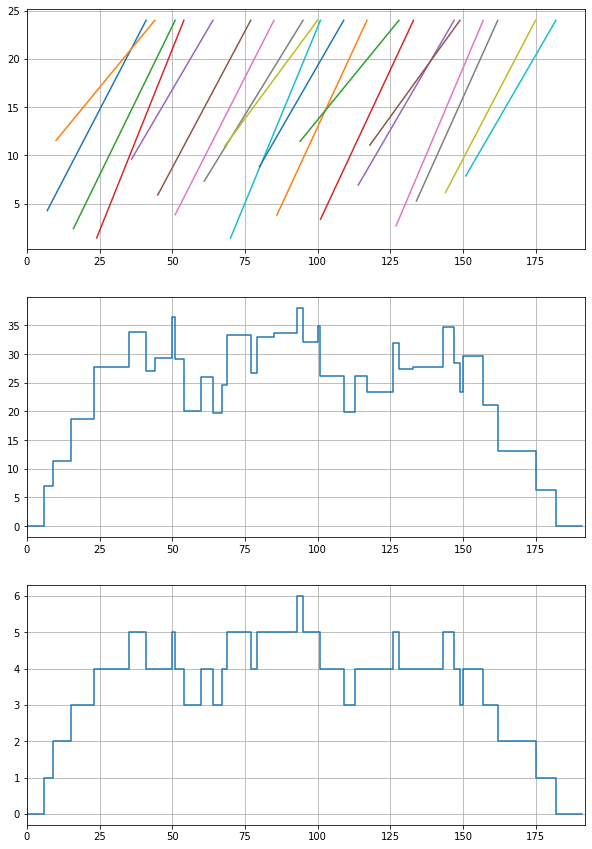

In [8]:
plt.rcParams['figure.figsize'] = [10, 15]

fig = plt.figure()

plt.subplot(3,1,1)
for n in range(N):
    plt.plot(X[n],Y[n])
plot_common()

samples = [i for i in range(total_samples)]

# Consumed power across the total time
plt.subplot(3,1,2)
plt.step(samples, P)
plot_common()

# Vehicles connected at the same time
plt.subplot(3,1,3)
plt.step(samples, V)
plot_common()


In [9]:
df

,capacity,p_max,p_min,epsilon,delta_t,target_charge,soc,start_time,end_time,X,Y,p_charge_rate
0,24,22,0,0.1,300,24,4.30,7.0,41.0,"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ...","[4.3, 4.879411764705882, 5.458823529411764, 6....",6.952941
1,24,22,0,0.1,300,24,11.56,10.0,44.0,"[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 2...","[11.56, 11.925882352941176, 12.291764705882354...",4.390588
2,24,22,0,0.1,300,24,2.43,16.0,51.0,"[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 2...","[2.4299999999999997, 3.0462857142857143, 3.662...",7.395429
3,24,22,0,0.1,300,24,1.46,24.0,54.0,"[24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 3...","[1.4600000000000009, 2.2113333333333323, 2.962...",9.016000
4,24,22,0,0.1,300,24,9.62,36.0,64.0,"[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 4...","[9.62, 10.133571428571427, 10.647142857142855,...",6.162857
5,24,22,0,0.1,300,24,5.90,45.0,77.0,"[45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 5...","[5.900000000000002, 6.465624999999999, 7.03125...",6.787500
6,24,22,0,0.1,300,24,3.87,51.0,85.0,"[51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 6...","[3.870000000000001, 4.462058823529411, 5.05411...",7.104706
7,24,22,0,0.1,300,24,7.34,61.0,95.0,"[61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 7...","[7.34, 7.829999999999998, 8.32, 8.809999999999...",5.880000
8,24,22,0,0.1,300,24,10.95,68.0,100.0,"[68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 7...","[10.95, 11.357812499999998, 11.765624999999996...",4.893750
9,24,22,0,0.1,300,24,1.42,70.0,101.0,"[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 8...","[1.4200000000000017, 2.1483870967742007, 2.876...",8.740645
